# Game Database Analysis

This is a Python code for analyzing a game database from the Backlogged service. The code performs various data cleaning, exploration, and visualization tasks to gain insights into the dataset.

Backloggd is a video game collection website mixed with social elements to focus on bringing your gaming profile to life.

This dataset contains a list of video games dating from 1980 to 2023, it also provides things such as release dates, user review rating, and critic review rating.

The aim of the analysis is to find the most popular game genres, which team produces the most of them, and how their distribution has changed over time.

The dataset comes from Kaggle - https://www.kaggle.com/datasets/arnabchaki/popular-video-games-1980-2023    

## Importing Libraries

First, we import the necessary libraries: pandas for data manipulation, seaborn and matplotlib.pyplot for data visualization.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Loading the Data

Next, we load the game database from a CSV file into a pandas DataFrame.

In [2]:
games_df = pd.read_csv('./games.csv', index_col=0)

## Data Overview

We start by getting an overview of the data by displaying the DataFrame and its summary information.

In [3]:
games_df.head()  # Display the first few rows of the DataFrame

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [4]:
games_df.tail()  # Display the last few rows of the DataFrame

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
1507,Back to the Future: The Game,"Dec 22, 2010",['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1508,Team Sonic Racing,"May 21, 2019","['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1.5K,49,413,107
1509,Dragon's Dogma,"May 22, 2012",['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206
1510,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602
1511,The LEGO Movie Videogame,"Feb 04, 2014","['WB Games', 'TT Fusion']",2.8,184,184,"['Adventure', 'Puzzle']",Join Emmet and an unlikely group of resistance...,"['Legal', 'Pretty Average Lego Game But It Was...",1.7K,11,239,73


In [5]:
games_df.info()  # Display summary information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
Index: 1512 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1512 non-null   object 
 1   Release Date       1512 non-null   object 
 2   Team               1511 non-null   object 
 3   Rating             1499 non-null   float64
 4   Times Listed       1512 non-null   object 
 5   Number of Reviews  1512 non-null   object 
 6   Genres             1512 non-null   object 
 7   Summary            1511 non-null   object 
 8   Reviews            1512 non-null   object 
 9   Plays              1512 non-null   object 
 10  Playing            1512 non-null   object 
 11  Backlogs           1512 non-null   object 
 12  Wishlist           1512 non-null   object 
dtypes: float64(1), object(12)
memory usage: 165.4+ KB


## Handling Missing Values

Let's find out exactly how many NaN values there are.

In [6]:
games_df.isna().sum()

Title                 0
Release Date          0
Team                  1
Rating               13
Times Listed          0
Number of Reviews     0
Genres                0
Summary               1
Reviews               0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
dtype: int64

It's not a huge collection, so let's have a look.

In [7]:
games_df[games_df.isna().any(axis=1)]

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
587,Final Fantasy XVI,"Jun 22, 2023","['Square Enix', 'Square Enix Creative Business...",NaN,422,422,['RPG'],Final Fantasy XVI is an upcoming action role-p...,[],37,10,732,2.4K
649,Death Stranding 2,releases on TBD,['Kojima Productions'],NaN,105,105,"['Adventure', 'Shooter']",NaN,[],3,0,209,644
713,Final Fantasy VII Rebirth,"Dec 31, 2023",['Square Enix'],NaN,192,192,[],This next standalone chapter in the FINAL FANT...,[],20,3,354,1.1K
719,Lies of P,"Aug 01, 2023","['NEOWIZ', 'Round8 Studio']",NaN,175,175,['RPG'],"Inspired by the familiar story of Pinocchio, L...",[],5,0,260,939
726,Judas,"Mar 31, 2025",['Ghost Story Games'],NaN,90,90,"['Adventure', 'Shooter']",A disintegrating starship. A desperate escape ...,[],1,0,92,437
746,Like a Dragon Gaiden: The Man Who Erased His Name,"Dec 31, 2023","['Ryū Ga Gotoku Studios', 'Sega']",NaN,118,118,"['Adventure', 'Brawler', 'RPG']",This game covers Kiryu's story between Yakuza ...,[],2,1,145,588
972,The Legend of Zelda: Tears of the Kingdom,"May 12, 2023","['Nintendo', 'Nintendo EPD Production Group No...",NaN,581,581,"['Adventure', 'RPG']",The Legend of Zelda: Tears of the Kingdom is t...,[],72,6,1.6K,5.4K
1130,Star Wars Jedi: Survivor,"Apr 28, 2023","['Respawn Entertainment', 'Electronic Arts']",NaN,250,250,['Adventure'],The story of Cal Kestis continues in Star Wars...,[],13,2,367,1.4K
1160,We Love Katamari Reroll + Royal Reverie,"Jun 02, 2023","['Bandai Namco Entertainment', 'MONKEYCRAFT Co...",NaN,51,51,"['Adventure', 'Puzzle']",We Love Katamari Reroll + Royal Reverie is a r...,[],3,0,74,291
1202,Earthblade,"Dec 31, 2024",['Extremely OK Games'],NaN,83,83,"['Adventure', 'Indie', 'RPG']","You are Névoa, an enigmatic child of Fate retu...",[],0,1,103,529


As we can see, these are pre-release games when the database was created, so we decide to remove them.
The exception is 'NEET Girl Date Night', but it does not contain the team name, one of the key elements of the analysis, so we decide to remove this record as well.

To handle missing values, we drop rows that contain any missing values using the dropna() method.

In [8]:
games_df.dropna(inplace=True)  # Drop rows with missing values

## Removing Unnecessary Columns

We remove the 'Summary' and 'Reviews' columns from the DataFrame using the drop() method.

In [9]:
col_drop = ['Summary', 'Reviews']
games_ndf = games_df.drop(col_drop, axis=1)

## Handling Duplicate Rows

We check for and remove duplicate rows from the DataFrame.

In [10]:
games_ndf.duplicated().sum()  # Count duplicate rows

392

The database contains a lot of duplicates, let's check a sample record.

In [11]:
games_ndf[games_ndf.duplicated() == True].head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Plays,Playing,Backlogs,Wishlist
326,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']",17K,3.8K,4.6K,4.8K
327,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",21K,3.2K,6.3K,3.6K
328,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",30K,2.5K,5K,2.6K
329,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",28K,679,4.9K,1.8K
330,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",21K,2.4K,8.3K,2.3K


In [12]:
games_ndf[games_ndf['Title'] == 'Elden Ring']

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']",17K,3.8K,4.6K,4.8K
326,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']",17K,3.8K,4.6K,4.8K
776,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']",17K,3.8K,4.6K,4.8K


Duplicates were created because of the 'Summary' and 'Reviews' columns. We decide to remove all duplicates.

In [13]:
games_ndf.drop_duplicates(inplace=True)  # Drop duplicate rows

## Data Cleaning and Formatting

We perform data cleaning and formatting operations on selected columns in the DataFrame.

In [14]:
# Clean numeric columns by removing symbols and converting to int
col_num = ['Times Listed', 'Number of Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist']
for col in col_num:
    games_ndf[col] = games_ndf[col].str.replace("K", "000").str.replace(".", "").astype('int')

# Convert strings representing lists to actual lists
import ast
games_ndf['Genres'] = games_ndf['Genres'].apply(ast.literal_eval)
games_ndf['Team'] = games_ndf['Team'].apply(ast.literal_eval)

# Convert 'Release Date' column to datetime format
index_to_drop = games_ndf[games_ndf['Release Date'] == 'releases on TBD'].index
games_ndf = games_ndf.drop(index=index_to_drop, axis=0)
games_ndf["Release Date"] = pd.to_datetime(games_ndf["Release Date"])

## Genre and Team Analysis

We perform analysis on the genres and teams associated with the games.

In [15]:
# Count the occurrences of each genre
all_genres = [genre for genres_list in games_ndf['Genres'] for genre in genres_list]
genre_counts = pd.Series(all_genres).value_counts()
genre_counts

Adventure              717
RPG                    359
Shooter                260
Platform               241
Indie                  205
Puzzle                 131
Strategy               116
Brawler                104
Simulator               94
Turn Based Strategy     71
Fighting                64
Arcade                  60
Visual Novel            53
Tactical                42
Racing                  37
Point-and-Click         36
Music                   20
Sport                   20
Card & Board Game       13
Real Time Strategy       9
Quiz/Trivia              3
MOBA                     2
Pinball                  1
Name: count, dtype: int64

In [16]:
# Count the occurrences of each team
all_teams = [team for team_list in games_ndf['Team'] for team in team_list]
team_counts = pd.Series(all_teams).value_counts()
team_counts.head(10)

Nintendo                      173
Capcom                         64
Square Enix                    57
Sega                           45
Electronic Arts                42
Konami                         31
Activision                     30
Ubisoft Entertainment          27
Atlus                          26
Bandai Namco Entertainment     26
Name: count, dtype: int64

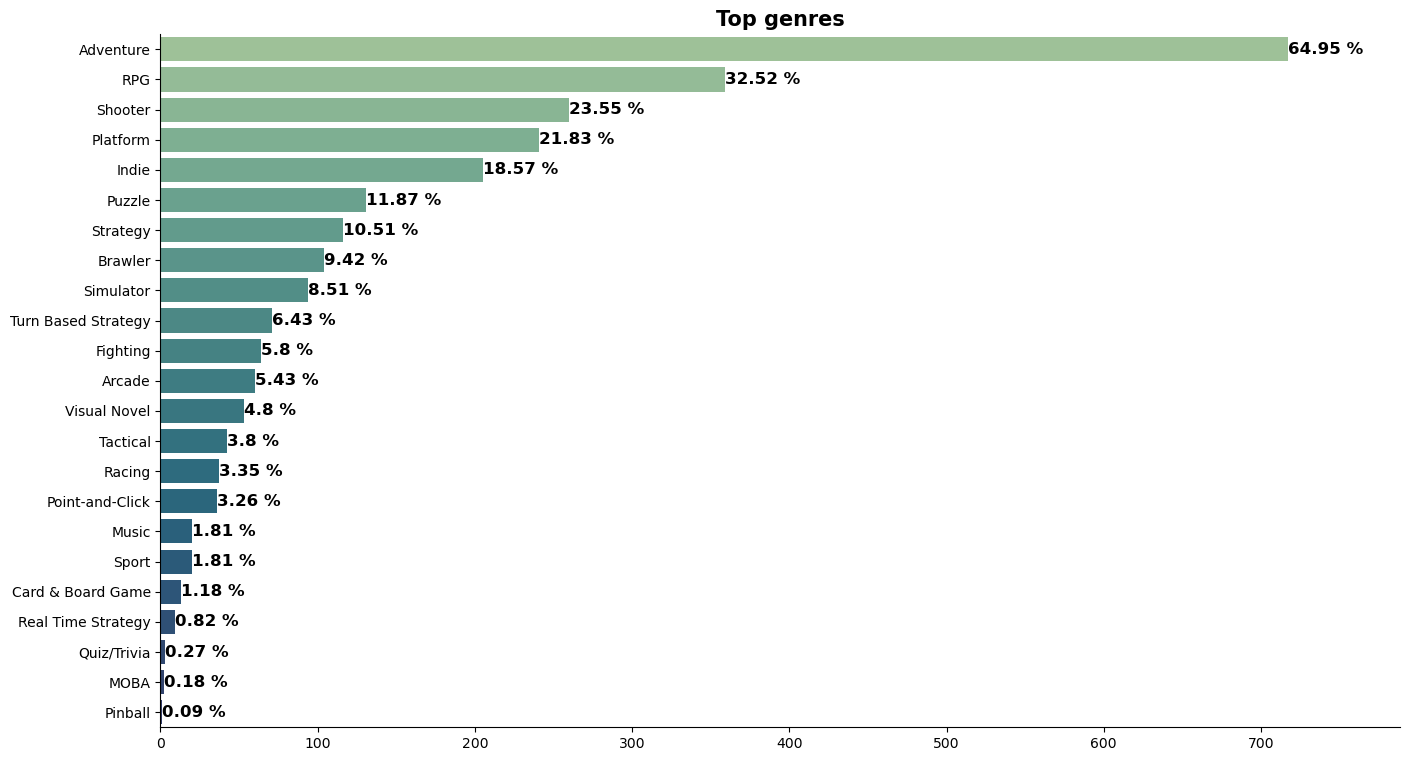

In [17]:
# Visualize the top genres
fig, ax = plt.subplots(figsize=(16, 9))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='crest')
ax.set_title("Top genres", fontsize=15, weight='bold')

# Add labels showing the percentage of each genre
for i, v in enumerate(genre_counts.values):
    ax.text(v, i, str(round(v / len(games_ndf) * 100, 2)) + ' %', color="black", ha="left", va="center", fontsize=12, weight='bold')
ax.set_xlim(right=max(genre_counts.values) * 1.1)
sns.despine(right=True, top=True)
plt.show()

We can easily see that the most popular genre is Adventure. However, it is worth noting that a single game can represent several genres, e.g. Elden Ring is both Adventure and RPG.

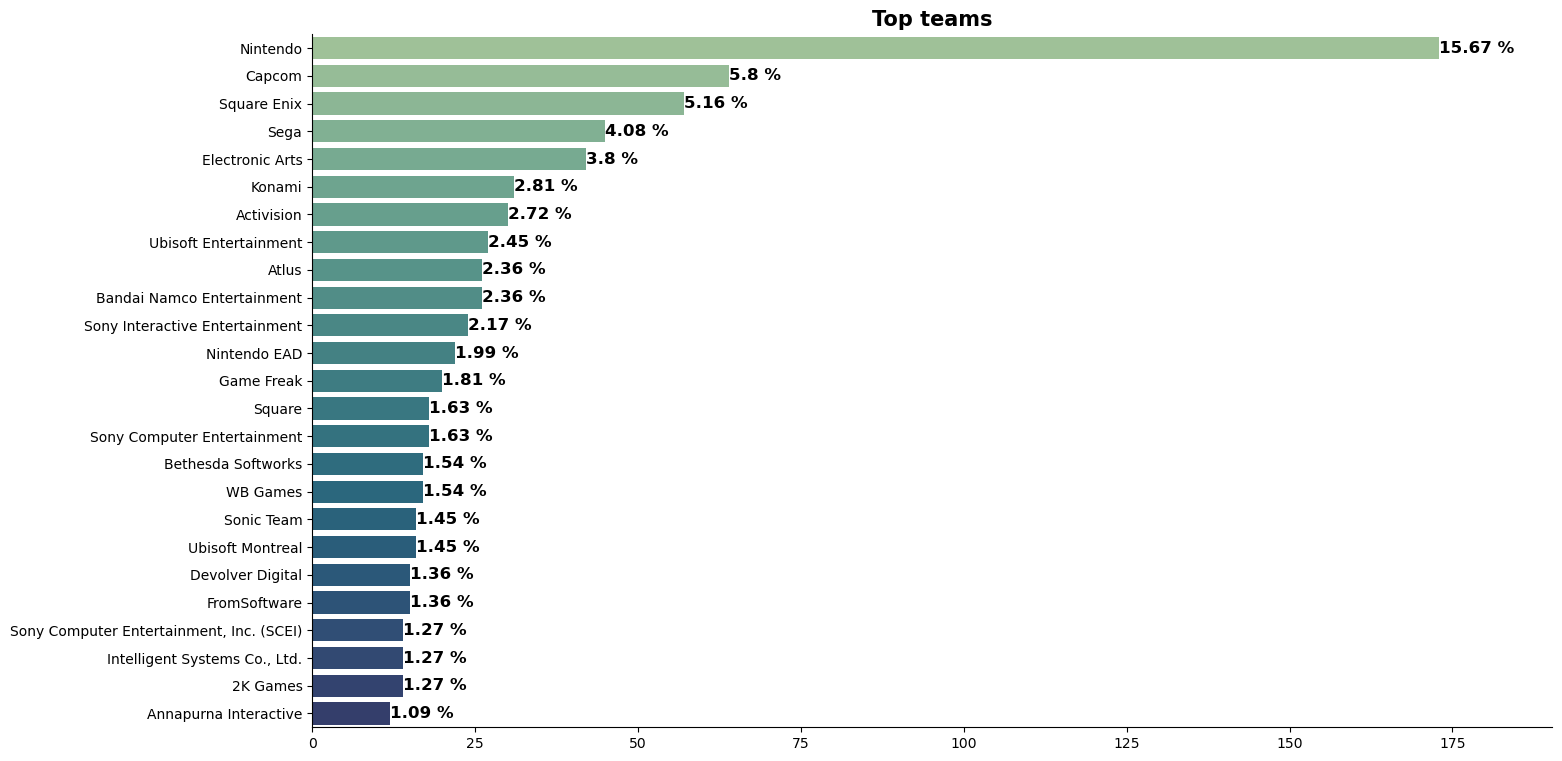

In [18]:
# Visualize the top teams
fig, ax = plt.subplots(figsize=(16, 9))
sns.barplot(x=team_counts[:25].values, y=team_counts[:25].index, palette='crest')
ax.set_title("Top teams", fontsize=15, weight='bold')

# Add labels to show the participation of each team
for i, v in enumerate(team_counts[:25].values):
    ax.text(v, i, str(round(v / len(games_ndf) * 100, 2)) + ' %', color="black", ha="left", va="center", fontsize=12, weight='bold')
ax.set_xlim(right=max(team_counts.values) * 1.1)
sns.despine(right=True, top=True)
plt.show()

As with genres, it is important to remember that several teams may have been involved in a single production.
Also note that the database covers a period of over 40 years, so many teams have merged or changed names, such as Sony Interactive Entertainment.

So let's see which teams have the best average rating of games produced.

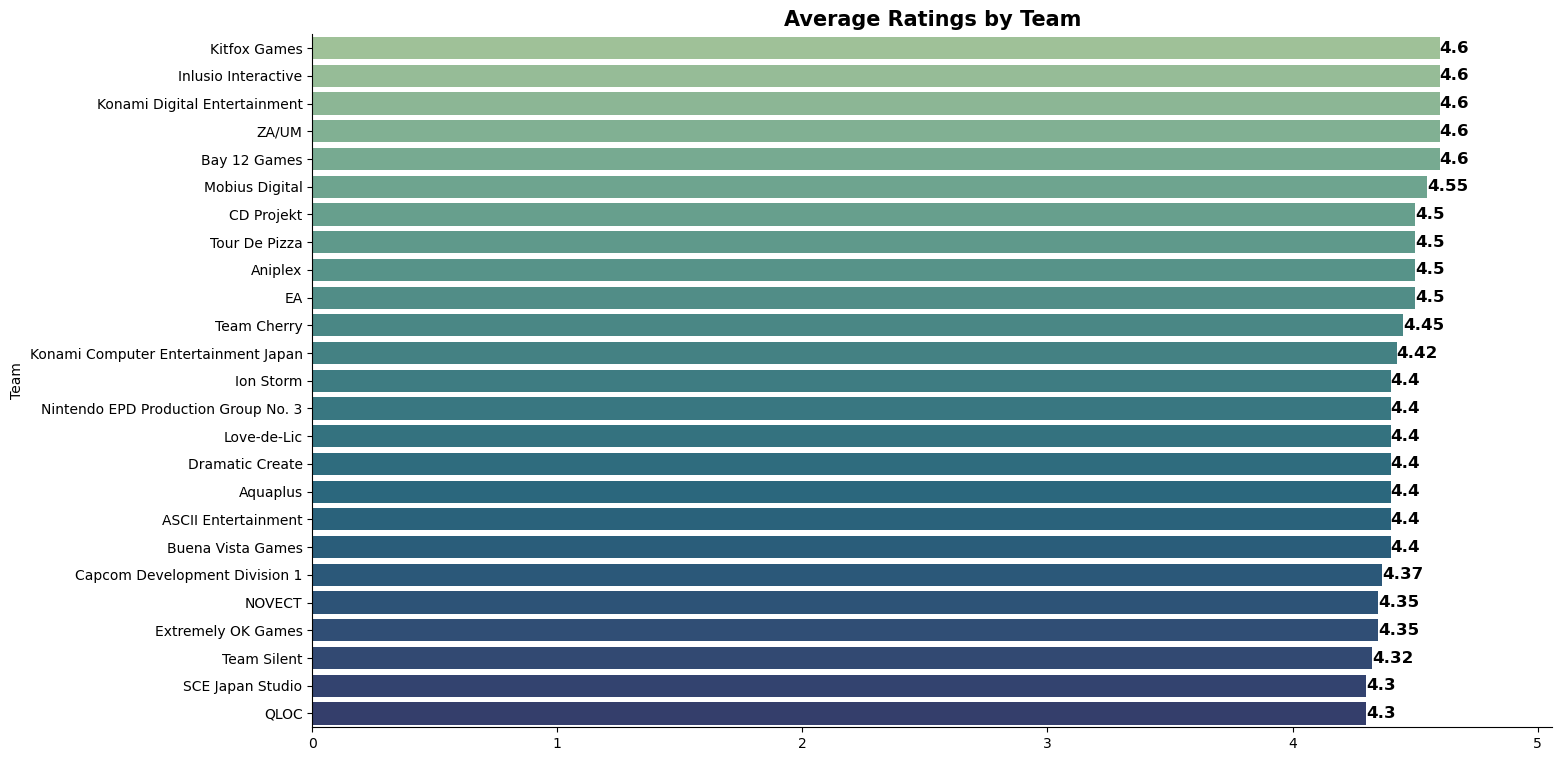

In [19]:
# Calculate the average ratings for each team
team_avg_ratings = games_ndf.explode('Team').groupby('Team')['Rating'].mean().sort_values(ascending=False)

# Visualize the average ratings by team
fig, ax = plt.subplots(figsize=(16, 9))
sns.barplot(x=team_avg_ratings[:25].values, y=team_avg_ratings[:25].index, palette='crest')
ax.set_title("Average Ratings by Team", fontsize=15, weight='bold')

# Add labels to show the average rating for each team
for i, v in enumerate(team_avg_ratings[:25].values):
    ax.text(v, i, str(round(v, 2)), color="black", ha="left", va="center", fontsize=12, weight='bold')
ax.set_xlim(right=max(team_avg_ratings.values) * 1.1)
sns.despine(right=True, top=True)
plt.show()

Quantity does not go hand in hand with quality, as we can see.

## Release Date Analysis

We analyze the distribution of games by their release dates.
As the database does not include all 2023 productions, we have decided to exclude games produced in this year from this part of the analysis.

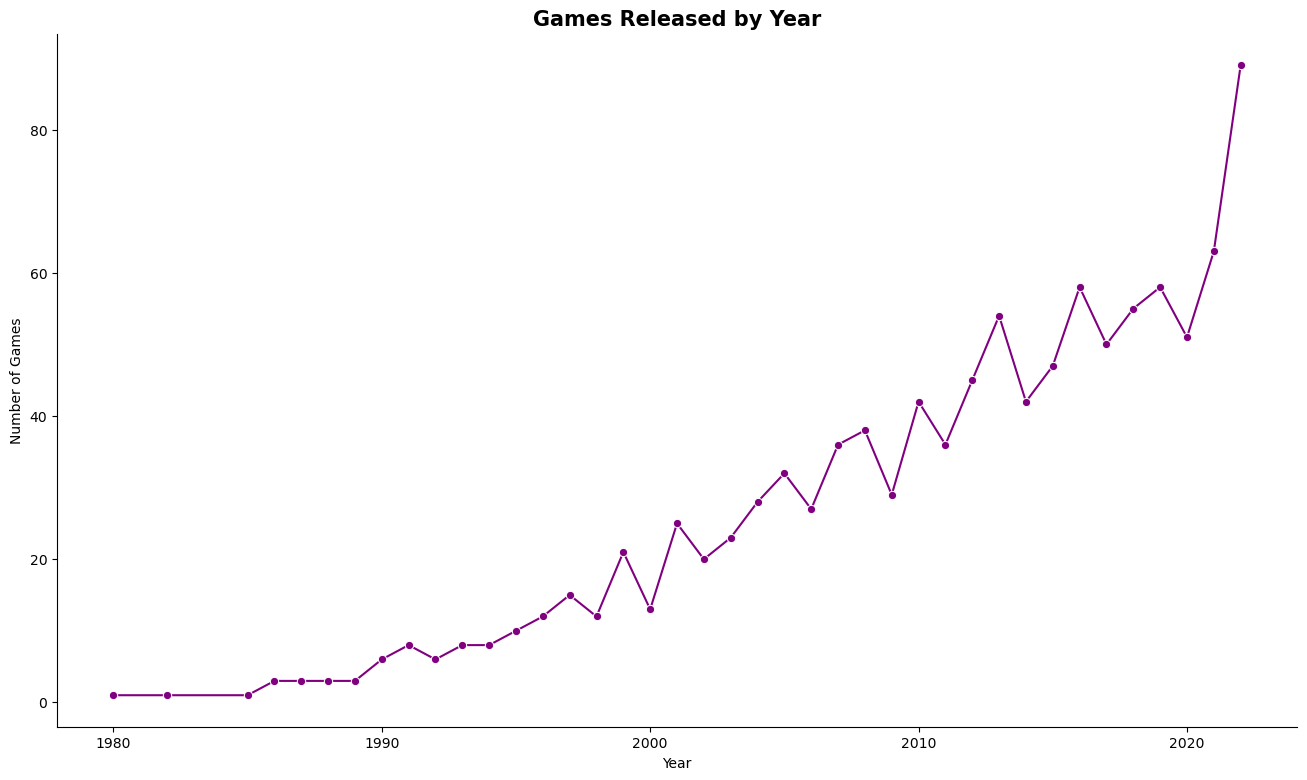

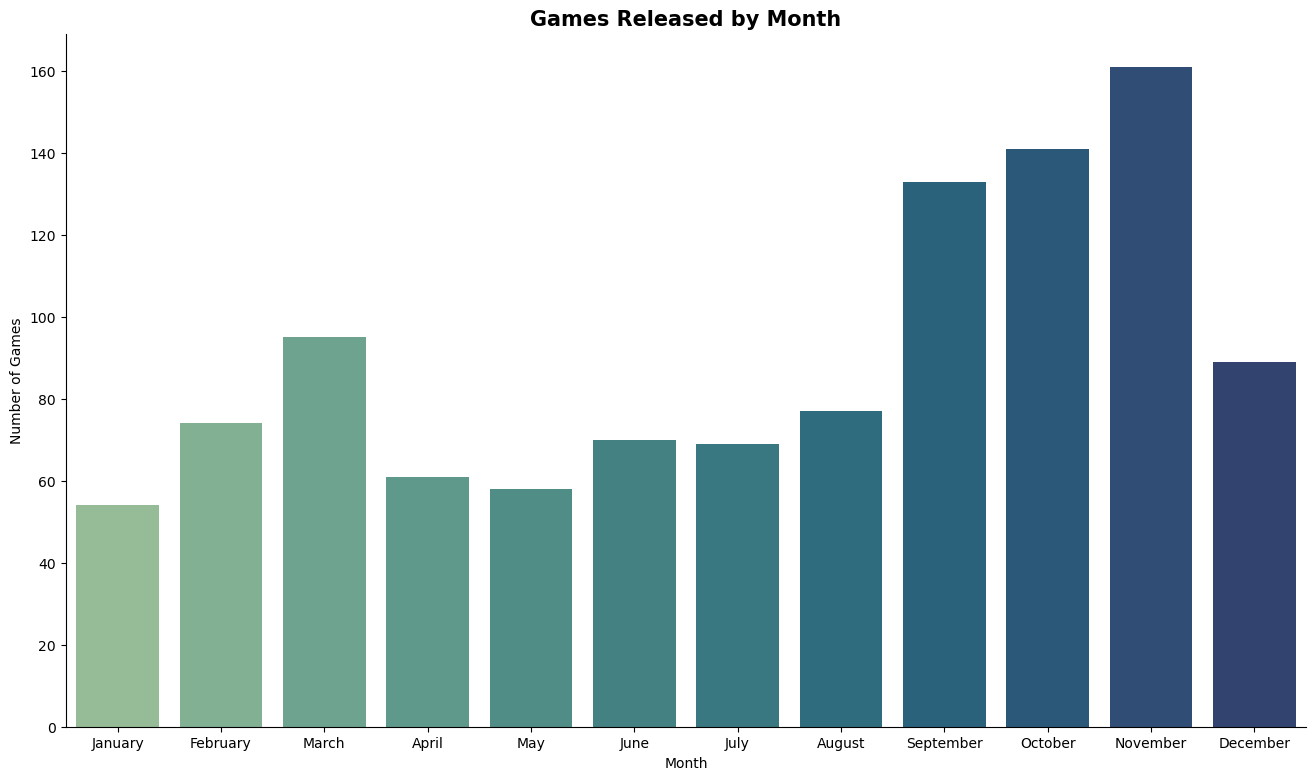

In [20]:
# Extract year and month from the 'Release Date' column
games_ndf['Year'] = games_ndf['Release Date'].dt.year
games_ndf['Month'] = games_ndf['Release Date'].dt.month_name()

# Count the number of games released each year
year_counts = games_ndf[games_ndf['Year'] != 2023]['Year'].value_counts().sort_index()

# Count the number of games released each month
month_counts = games_ndf[games_ndf['Year'] != 2023]['Month'].value_counts().sort_index()

# Visualize the number of games released by year
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='purple')
ax.set_title("Games Released by Year", fontsize=15, weight='bold')
ax.set_xlabel("Year")
ax.set_ylabel("Number of Games")
sns.despine()
plt.show()

# Sort the month counts by month index
import calendar
month_counts_sorted = month_counts.reindex(index=calendar.month_name[1:])

# Visualize the number of games released by month
fig, ax = plt.subplots(figsize=(16, 9))
sns.barplot(x=month_counts_sorted.index, y=month_counts_sorted.values, palette='crest')
ax.set_title("Games Released by Month", fontsize=15, weight='bold')
ax.set_xlabel("Month")
ax.set_ylabel("Number of Games")
sns.despine()
plt.show()

We can see a clear increase in game production. There is also a huge increase between 2021 and 2022 (more than 20 releases!).
Most games are released at the end of the year, most likely due to the holiday shopping season.

## Player Activity Analysis

We analyze player activity based on the 'Plays', 'Playing', 'Backlogs', and 'Wishlist' columns.

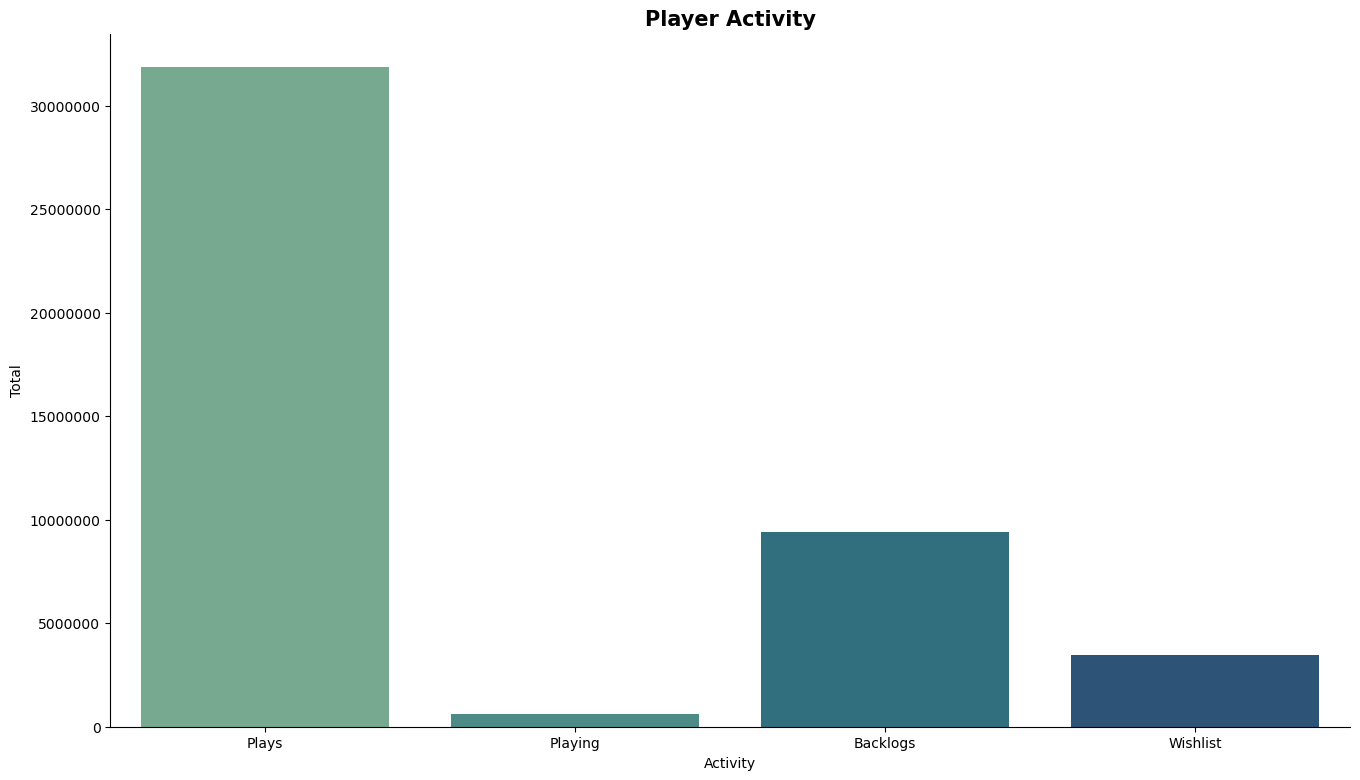

In [21]:
# Calculate the total number of plays, players playing, backlogs, and wishlists
total_plays = games_ndf['Plays'].sum()
total_playing = games_ndf['Playing'].sum()
total_backlogs = games_ndf['Backlogs'].sum()
total_wishlist = games_ndf['Wishlist'].sum()

# Create a DataFrame to store the activity information
activity_data = {
    'Activity': ['Plays', 'Playing', 'Backlogs', 'Wishlist'],
    'Total': [total_plays, total_playing, total_backlogs, total_wishlist]
}
activity_games_ndf = pd.DataFrame(activity_data)

# Visualize player activity
fig, ax = plt.subplots(figsize=(16, 9))
sns.barplot(x=activity_games_ndf['Activity'], y=activity_games_ndf['Total'], palette='crest')
ax.set_title("Player Activity", fontsize=15, weight='bold')
ax.set_xlabel("Activity")
ax.set_ylabel("Total")
plt.ticklabel_format(style='plain', axis='y')
sns.despine()
plt.show()

An interesting feature is the large number of backlogs, i.e. having access to the game but not having started it. Having and using are two different things.

## Calculate Average Ratings by Genre

We calculate average ratings for each genre by iterating over the dataset and storing the results in a dictionary.

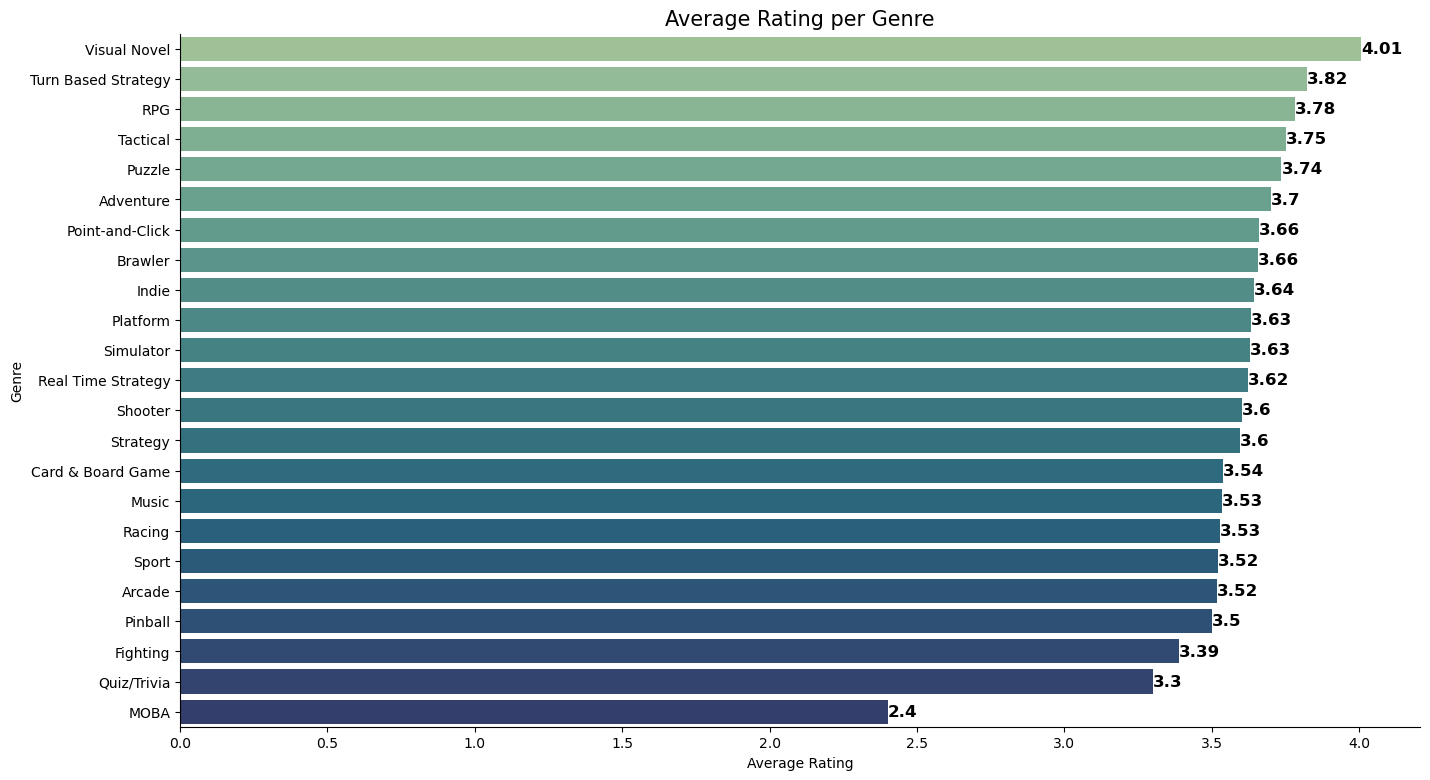

In [22]:
# Calculate average ratings for each genre
average_ratings_by_genre = {}
for index, row in games_ndf.iterrows():
    for genre in row['Genres']:
        if genre not in average_ratings_by_genre:
            average_ratings_by_genre[genre] = {'TotalRating': row['Rating'], 'Count': 1}
        else:
            average_ratings_by_genre[genre]['TotalRating'] += row['Rating']
            average_ratings_by_genre[genre]['Count'] += 1

for genre in average_ratings_by_genre:
    average_ratings_by_genre[genre]['AverageRating'] = average_ratings_by_genre[genre]['TotalRating'] / average_ratings_by_genre[genre]['Count']

# Create a dataframe with average ratings for each genre
average_ratings_df = pd.DataFrame.from_dict(average_ratings_by_genre, orient='index')
average_ratings_df = average_ratings_df.reset_index().rename(columns={'index': 'Genre', 'AverageRating': 'Average Rating'})
average_ratings_df = average_ratings_df.sort_values('Average Rating', ascending=False)

# Plot the average ratings per genre
fig, ax = plt.subplots(figsize=(16, 9))
sns.barplot(data=average_ratings_df, x='Average Rating', y='Genre', palette='crest')
ax.set_title("Average Rating per Genre", fontsize=15)

# Add labels showing the percentage of each genre
for i, v in enumerate(average_ratings_df['Average Rating']):
    ax.text(v, i, str(round(v, 2)), color="black", ha="left", va="center", fontsize=12, weight='bold')
sns.despine(right=True, top=True)
plt.show()

The best average rating is for games in the Visual Novel genre. This may indicate that one of the most important features of a game is a good story.

The worst rated games are MOBAs, i.e. multiplayer online battle arena games. As we can see, the high popularity of games like LoL does not equate to high player ratings.

## Find Best Rated Games in Each Genre

We create a dictionary, best_rated_games, to store the highest-rated games for each genre. In the next step, we are going to transform the dictionary into a DataFrame.

In [23]:
# Create a dictionary for the best-rated games in each genre
best_rated_games = {}
for index, row in games_ndf.iterrows():
    for genre in row['Genres']:
        if genre not in best_rated_games:
            best_rated_games[genre] = [{'Title': row['Title'], 'Rating': row['Rating']}]
        else:
            if row['Rating'] > best_rated_games[genre][0]['Rating']:
                best_rated_games[genre] = [{'Title': row['Title'], 'Rating': row['Rating']}]
            elif row['Rating'] == best_rated_games[genre][0]['Rating']:
                best_rated_games[genre].append({'Title': row['Title'], 'Rating': row['Rating']})

# Sort the best_rated_games dictionary by genre and game title
sorted_best_rated_games = {genre: sorted(games, key=lambda x: x['Title']) for genre, games in sorted(best_rated_games.items())}

# Display the best-rated games in each genre
best_rated_games_df = pd.DataFrame.from_dict({(i, j): best_rated_games[i][j] for i in best_rated_games.keys() for j in range(len(best_rated_games[i]))}, orient='index')
best_rated_games_df.sort_index().style.hide(level=1).format({'Rating': '{:.1f}'})

## Analyze Game Popularity by Genre

We analyze game popularity by genre and displays the games with the highest player counts for past and current activity in each genre.

In [24]:
# Create a dictionary for the games with the highest number of players who have played, for each genre
most_played_games_by_genre = {}
for index, row in games_ndf.iterrows():
    for genre in row['Genres']:
        if genre not in most_played_games_by_genre:
            most_played_games_by_genre[genre] = [{'Title': row['Title'], 'Genre': genre, 'Plays': row['Plays']}]
        else:
            if row['Plays'] > most_played_games_by_genre[genre][0]['Plays']:
                most_played_games_by_genre[genre] = [{'Title': row['Title'], 'Genre': genre, 'Plays': row['Plays']}]
            elif row['Plays'] == most_played_games_by_genre[genre][0]['Plays']:
                most_played_games_by_genre[genre].append({'Title': row['Title'], 'Genre': genre, 'Plays': row['Plays']})

# Create a dataframe with the games with the highest number of players who have played, for each genre
most_played_games_df = pd.DataFrame(columns=['Title', 'Genre', 'Plays'])
for genre, games in most_played_games_by_genre.items():
    most_played_games_df = pd.concat([most_played_games_df, pd.DataFrame(games)])

# Create a dictionary for the games with the highest number of players currently playing, for each genre
most_playing_games_by_genre = {}
for index, row in games_ndf.iterrows():
    for genre in row['Genres']:
        if genre not in most_playing_games_by_genre:
            most_playing_games_by_genre[genre] = [{'Title': row['Title'], 'Genre': genre, 'Playing': row['Playing']}]
        else:
            if row['Playing'] > most_playing_games_by_genre[genre][0]['Playing']:
                most_playing_games_by_genre[genre] = [{'Title': row['Title'], 'Genre': genre, 'Playing': row['Playing']}]
            elif row['Playing'] == most_playing_games_by_genre[genre][0]['Playing']:
                most_playing_games_by_genre[genre].append({'Title': row['Title'], 'Genre': genre, 'Playing': row['Playing']})

# Create a dataframe with the games with the highest number of players currently playing, for each genre
most_playing_games_df = pd.DataFrame(columns=['Title', 'Genre', 'Playing'])
for genre, games in most_playing_games_by_genre.items():
    most_playing_games_df = pd.concat([most_playing_games_df, pd.DataFrame(games)])

In [25]:
# Display the games with the highest number of players who have played, for each genre
print("\nGames with the Highest Number of Players who have Played, for Each Genre:")
most_played_games_df.sort_values(['Plays', 'Genre', 'Title'], ascending=[False, True, True]).style.hide(names=False)


Games with the Highest Number of Players who have Played, for Each Genre:


Title,Genre,Plays
Danganronpa 2: Goodbye Despair,Adventure,99000
Marvel's Spider-Man: Miles Morales,Adventure,99000
Resident Evil Village,Adventure,99000
Sonic Generations,Adventure,99000
Marvel's Spider-Man: Miles Morales,Brawler,99000
Sonic Generations,Platform,99000
Danganronpa 2: Goodbye Despair,Point-and-Click,99000
Resident Evil Village,Shooter,99000
Animal Crossing: New Leaf,Simulator,99000
Danganronpa 2: Goodbye Despair,Visual Novel,99000


In [26]:
# Display the games with the highest number of players currently playing, for each genre
print("\nGames with the Highest Number of Players Currently Playing, for Each Genre:")
most_playing_games_df.sort_values(['Playing', 'Genre', 'Title'], ascending=[False, True, True]).style.hide(names=False)


Games with the Highest Number of Players Currently Playing, for Each Genre:


Title,Genre,Playing
Elden Ring,Adventure,38000
Elden Ring,RPG,38000
Hades,Brawler,32000
Hades,Indie,32000
Hollow Knight,Platform,24000
Persona 5 Royal,Turn Based Strategy,23000
Animal Crossing: New Horizons,Simulator,18000
Minecraft,Simulator,18000
Yakuza 0,Simulator,18000
Red Dead Redemption 2,Shooter,17000


## Visualize Game Popularity

We generate two bar plots: one for the games with the highest number of current players and another for the games with the highest number of players who have played. 

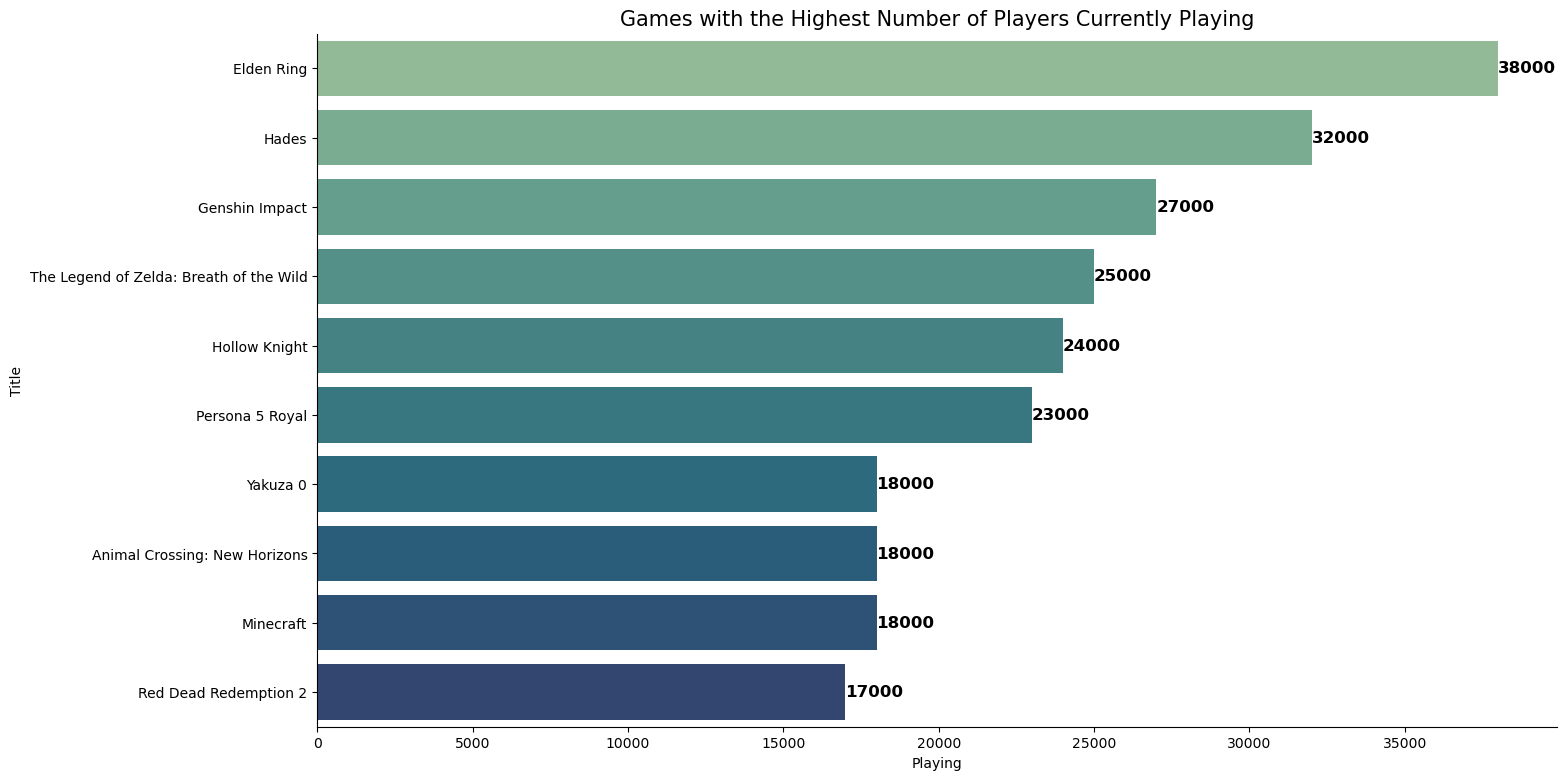

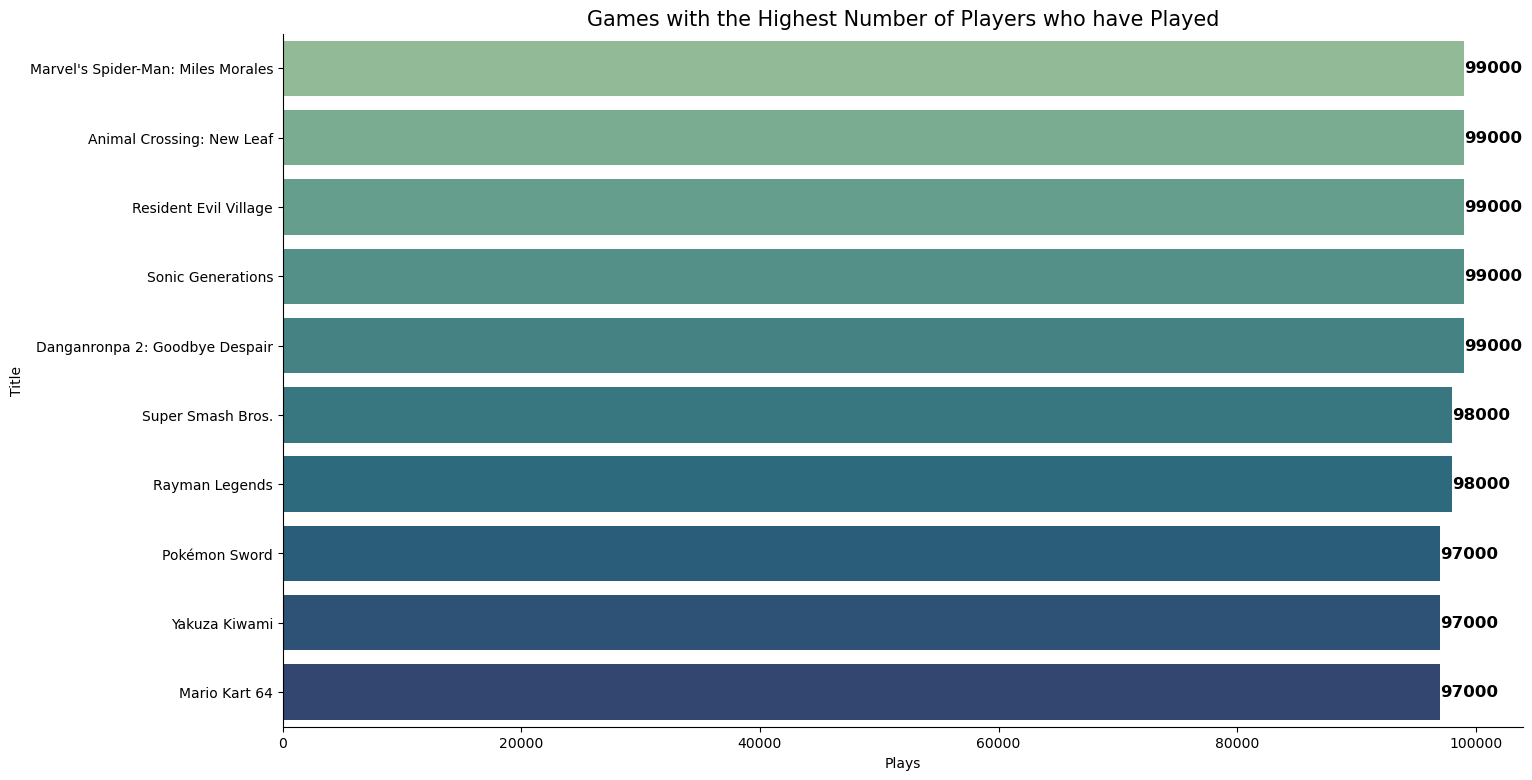

In [27]:
# Plot the games with the highest number of players currently playing
fig, ax = plt.subplots(figsize=(16, 9))
sns.barplot(data=games_ndf.sort_values('Playing', ascending=False).head(10), x='Playing', y='Title', palette='crest')
ax.set_title("Games with the Highest Number of Players Currently Playing", fontsize=15)

# Add labels showing the percentage of each genre
for i, v in enumerate(games_ndf['Playing'].sort_values(ascending=False).head(10)):
    ax.text(v, i, str(v), color="black", ha="left", va="center", fontsize=12, weight='bold')
sns.despine(right=True, top=True)
plt.show()

# Plot the games with the highest number of players who have played
fig, ax = plt.subplots(figsize=(16, 9))
sns.barplot(data=games_ndf.sort_values('Plays', ascending=False).head(10), x='Plays', y='Title', palette='crest')
ax.set_title("Games with the Highest Number of Players who have Played", fontsize=15)

# Add labels showing the percentage of each genre
for i, v in enumerate(games_ndf['Plays'].sort_values(ascending=False).head(10)):
    ax.text(v, i, str(v), color="black", ha="left", va="center", fontsize=12, weight='bold')
sns.despine(right=True, top=True)
plt.show()

## Conclusion

- The Adventure genre is the most popular, constituting 64.95% of the entire database, which is twice the share of the second genre, RPG, at 32.52%.

- Nintendo is involved in the largest number of games, accounting for 15.67% of the total number of games in the database. This is almost three times more than Capcom and Square Enix, which account for 5.8% and 5.16% respectively.

- Visual Novel games receive the highest average ratings, suggesting that one of the most important features of games is their storyline.

- There is a clear upward trend in game production, with a significant increase in the number of games between 2021 and 2022.

- The majority of games are released in Q4.

- Player activity analysis revealed a significant number of backlogged games, indicating games owned but not yet played.

- The average rating for games is approximately 3.5 out of 5.